In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
penguins = pd.read_csv('penguins.csv')

In [13]:
print("Dataset Information: ")
print()
penguins.info()
print()

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB



In [14]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [15]:

if penguins.isnull().any().any():
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are null values in the DataFrame.


In [17]:
if penguins.select_dtypes(include=[np.number]).isnull().any().any():
    print("There are null values in the numerical columns of the DataFrame.")
else:
    print("There are no null values in the numerical columns of the DataFrame.")


There are null values in the numerical columns of the DataFrame.


In [19]:
def impute_missing_data(data_frame, field_names):
    data_frame[field_names] = data_frame[field_names].apply(pd.to_numeric, errors='coerce')
    data_frame[field_names] = data_frame[field_names].fillna(data_frame[field_names].mean())

# Call the impute_missing_data function for the columns you want to process
columns_to_impute = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
impute_missing_data(penguins, columns_to_impute)

In [20]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,male,2009
340,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,female,2009
341,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,male,2009
342,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,male,2009


In [21]:
#checking again 
if penguins.select_dtypes(include=[np.number]).isnull().any().any():
    print("There are null values in the numerical columns of the DataFrame.")
else:
    print("There are no null values in the numerical columns of the DataFrame.")

There are no null values in the numerical columns of the DataFrame.


Here we get no null values now

In [23]:
#converting to lower case
def lowercase(data_frame):
    data_frame[data_frame.select_dtypes(include='object').columns] = data_frame.select_dtypes(include='object').apply(lambda x: x.str.lower())

lowercase(penguins)

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,adelie,torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,adelie,torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,adelie,torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,adelie,torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,adelie,torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007
...,...,...,...,...,...,...,...,...
339,chinstrap,dream,55.80000,19.80000,207.000000,4000.000000,male,2009
340,chinstrap,dream,43.50000,18.10000,202.000000,3400.000000,female,2009
341,chinstrap,dream,49.60000,18.20000,193.000000,3775.000000,male,2009
342,chinstrap,dream,50.80000,19.00000,210.000000,4100.000000,male,2009


In [24]:
def remove_outliers_iqr(data_frame, field_name, iqr_multiplier=1.5):
    Q1 = data_frame[field_name].quantile(0.25)
    Q3 = data_frame[field_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data_frame[(data_frame[field_name] >= lower_bound) & (data_frame[field_name] <= upper_bound)]

# Make a copy of the 'penguins' DataFrame
data_frame = penguins.copy()

# Before removing outliers
print("Before removing outliers:")
print(data_frame)

numeric_columns = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']

for column in numeric_columns:
    data_frame = remove_outliers_iqr(data_frame, column)

# After removing outliers
print("After removing outliers:")
print(data_frame)


Before removing outliers:
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       adelie  torgersen        39.10000       18.70000         181.000000   
1       adelie  torgersen        39.50000       17.40000         186.000000   
2       adelie  torgersen        40.30000       18.00000         195.000000   
3       adelie  torgersen        43.92193       17.15117         200.915205   
4       adelie  torgersen        36.70000       19.30000         193.000000   
..         ...        ...             ...            ...                ...   
339  chinstrap      dream        55.80000       19.80000         207.000000   
340  chinstrap      dream        43.50000       18.10000         202.000000   
341  chinstrap      dream        49.60000       18.20000         193.000000   
342  chinstrap      dream        50.80000       19.00000         210.000000   
343  chinstrap      dream        50.20000       18.70000         198.000000   

     body_mass_g     sex 

In [25]:
# Drop the 'year' column from the DataFrame
penguins.drop(['year'], axis=1, inplace=True)

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,adelie,torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,adelie,torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,adelie,torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,adelie,torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,adelie,torgersen,36.70000,19.30000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,chinstrap,dream,55.80000,19.80000,207.000000,4000.000000,male
340,chinstrap,dream,43.50000,18.10000,202.000000,3400.000000,female
341,chinstrap,dream,49.60000,18.20000,193.000000,3775.000000,male
342,chinstrap,dream,50.80000,19.00000,210.000000,4100.000000,male


In [26]:
# Define a function to perform label encoding and mode replacement
def label_encode_and_replace_mode(data_frame, column_name):
    data_frame.loc[:, column_name] = data_frame.loc[:, column_name].astype('category').cat.codes
    mode_value = data_frame[data_frame[column_name] != -1][column_name].mode()[0]
    data_frame.loc[:, column_name] = data_frame.loc[:, column_name].replace(-1, mode_value)

# Apply label encoding and mode replacement to categorical columns
categorical_columns = ['species', 'sex', 'island']
for column in categorical_columns:
    label_encode_and_replace_mode(penguins, column)

penguins

/var/folders/s3/9sx5fbrn25s37g1wlx46dhqh0000gn/T/ipykernel_9359/3827997587.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.loc[:, column_name] = data_frame.loc[:, column_name].astype('category').cat.codes
/var/folders/s3/9sx5fbrn25s37g1wlx46dhqh0000gn/T/ipykernel_9359/3827997587.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.loc[:, column_name] = data_frame.loc[:, column_name].astype('category').cat.codes
/var/folders/s3/9sx5fbrn25s37g1wlx46dhqh0000gn/T/ipykernel_9359/3827997587.py:3: DeprecationWarning: In a 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,1,1,55.80000,19.80000,207.000000,4000.000000,1
340,1,1,43.50000,18.10000,202.000000,3400.000000,0
341,1,1,49.60000,18.20000,193.000000,3775.000000,1
342,1,1,50.80000,19.00000,210.000000,4100.000000,1


In [27]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for column in numerical_columns:
    mean = penguins[column].mean()
    std = penguins[column].std()
    penguins[column] = (penguins[column] - mean) / std

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-8.857909e-01,0.786597,-1.420419,-0.564966,1
1,0,2,-8.123107e-01,0.126372,-1.063802,-0.502436,0
2,0,2,-6.653503e-01,0.431091,-0.421892,-1.190269,0
3,0,2,-1.305271e-15,0.000000,0.000000,0.000000,1
4,0,2,-1.326672e+00,1.091316,-0.564539,-0.940148,0
...,...,...,...,...,...,...,...
339,1,1,2.182007e+00,1.345248,0.433988,-0.252315,1
340,1,1,-7.750872e-02,0.481878,0.077371,-1.002678,0
341,1,1,1.043064e+00,0.532664,-0.564539,-0.533701,1
342,1,1,1.263505e+00,0.938956,0.647958,-0.127255,1


In [29]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int8   
 1   island             344 non-null    int8   
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int8   
dtypes: float64(4), int8(3)
memory usage: 11.9 KB


In [30]:
penguins.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,344.000000
mean,0.918605,0.662791,-1.156697e-15,3.717956e-16,-8.262125e-16,4.131062e-17,0.520349
std,0.893320,0.726194,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500313
min,0.000000,0.000000,-2.171694e+00,-2.057447e+00,-2.062329e+00,-1.878101e+00,0.000000
25%,0.000000,0.000000,-8.536433e-01,-7.877847e-01,-7.785088e-01,-8.150872e-01,0.000000
50%,1.000000,1.000000,6.026666e-02,7.558575e-02,-2.792454e-01,-1.897848e-01,1.000000
75%,2.000000,1.000000,8.409938e-01,7.865967e-01,8.619279e-01,6.856386e-01,1.000000
max,2.000000,2.000000,2.880069e+00,2.208619e+00,2.145748e+00,2.624076e+00,1.000000


In [32]:

X_data = penguins.drop('sex', axis=1)
Y_target = penguins['sex']

print("X_data Shape: ", X_data.shape)
print("Y_target Shape: ", Y_target.shape)

X_data Shape:  (344, 6)
Y_target Shape:  (344,)


In [33]:
# Calculate the number of samples for training (80%) and testing (20%)
training_samples = int(np.round(len(X_data) * 0.8))
testing_samples = len(X_data) - training_samples

# Slice the data for training and testing
X_train = X_data[:training_samples]
X_test = X_data[-testing_samples:]
Y_train = Y_target[:training_samples]
Y_test = Y_target[-testing_samples:]

# Print the shapes of the training and testing datasets
print("Training Data Shapes:")
print("X_train Shape:", X_train.shape)
print("Y_train Shape:", Y_train.shape)
print()
print("Testing Data Shapes:")
print("X_test Shape:", X_test.shape)
print("Y_test Shape:", Y_test.shape)

Training Data Shapes:
X_train Shape: (275, 6)
Y_train Shape: (275,)

Testing Data Shapes:
X_test Shape: (69, 6)
Y_test Shape: (69,)


Iteration 0: Loss = 0.5966391075284567
Iteration 1000: Loss = 0.27737772008688644
Iteration 2000: Loss = 0.27241344361112674
Iteration 3000: Loss = 0.2712798572035017
Iteration 4000: Loss = 0.2709084662655718


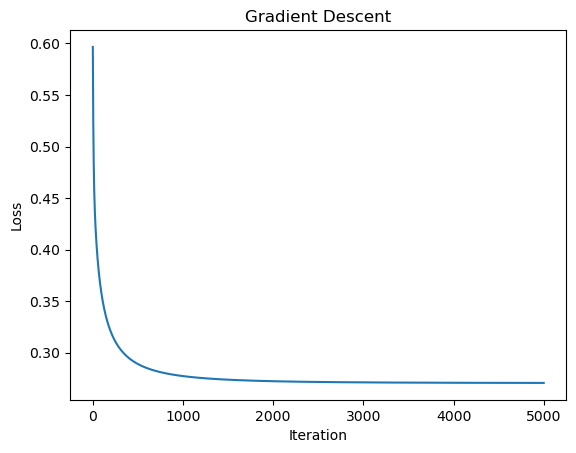

Iteration 0: Loss = 0.5651028713057004
Iteration 1000: Loss = 0.27768773070575303
Iteration 2000: Loss = 0.27261113543956267
Iteration 3000: Loss = 0.2713834547754418
Iteration 4000: Loss = 0.2709613826460279


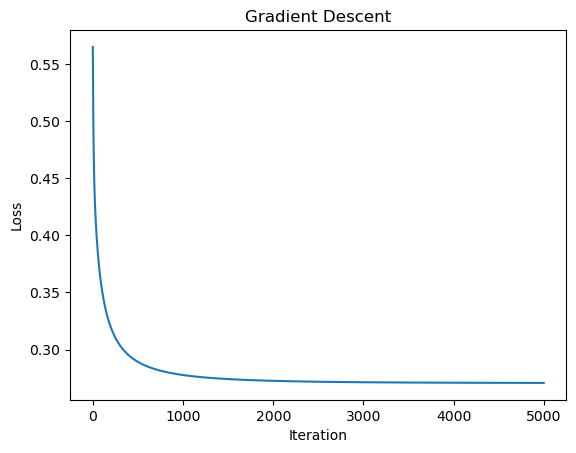



Learning Rate: 0.1, Iterations: 5000, Accuracy: 88.41%


Iteration 0: Loss = 0.5783281984883094
Iteration 1000: Loss = 0.27804033660021715
Iteration 2000: Loss = 0.27289028785261543
Iteration 3000: Loss = 0.27154623533419214
Iteration 4000: Loss = 0.2710480843818358
Iteration 5000: Loss = 0.27083589033930994
Iteration 6000: Loss = 0.2707383395001227
Iteration 7000: Loss = 0.2706914116550326
Iteration 8000: Loss = 0.2706682114002638
Iteration 9000: Loss = 0.27065655100758684


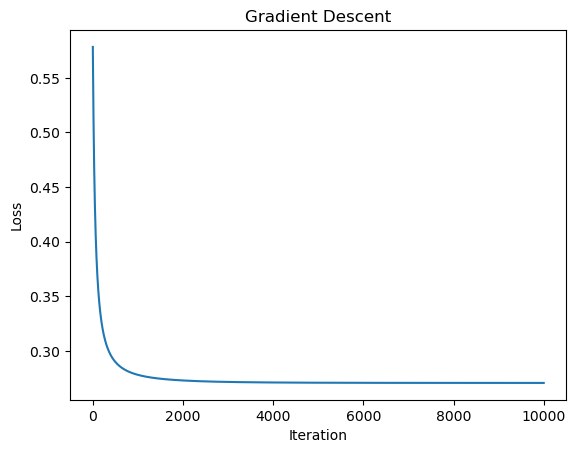

Iteration 0: Loss = 0.6319004010118113
Iteration 1000: Loss = 0.27632096247866955
Iteration 2000: Loss = 0.2721801379258413
Iteration 3000: Loss = 0.27124288389673595
Iteration 4000: Loss = 0.2709123383360961
Iteration 5000: Loss = 0.27077236054144
Iteration 6000: Loss = 0.27070757366696946
Iteration 7000: Loss = 0.2706761624552226
Iteration 8000: Loss = 0.2706605394198611
Iteration 9000: Loss = 0.27065265484629897


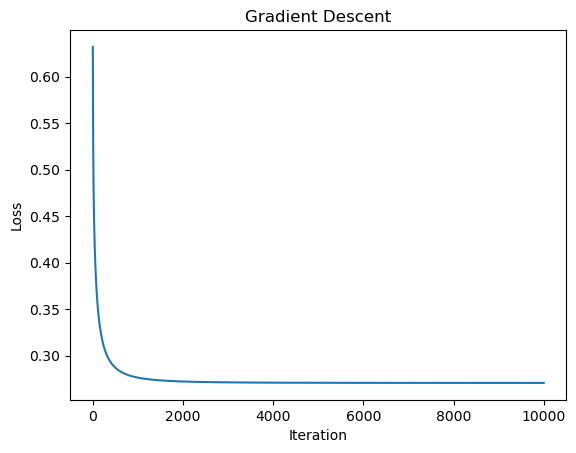



Learning Rate: 0.1, Iterations: 10000, Accuracy: 88.41%


Iteration 0: Loss = 0.6540691598740476
Iteration 1000: Loss = 0.34179907532386283
Iteration 2000: Loss = 0.3118585579355981
Iteration 3000: Loss = 0.29816588699017643
Iteration 4000: Loss = 0.29050821388980097


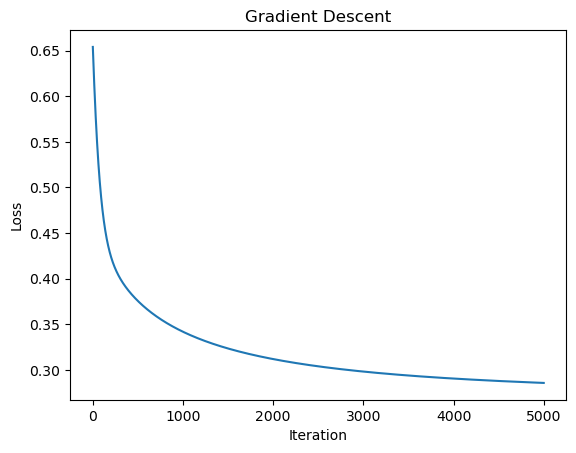

Iteration 0: Loss = 0.5774659582665498
Iteration 1000: Loss = 0.3531875344088658
Iteration 2000: Loss = 0.3176321021344995
Iteration 3000: Loss = 0.3021311881927693
Iteration 4000: Loss = 0.29356838296720905


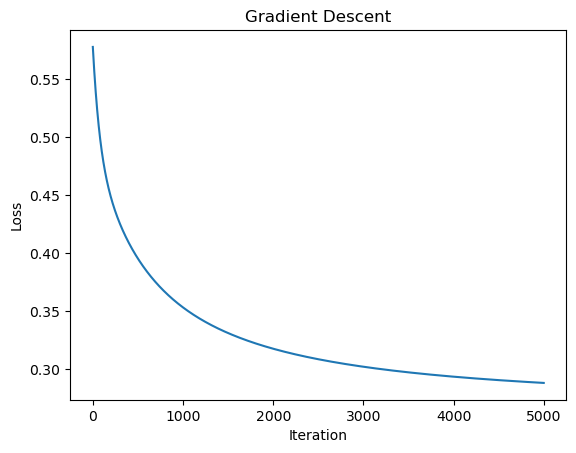



Learning Rate: 0.01, Iterations: 5000, Accuracy: 88.41%


Iteration 0: Loss = 0.7202220204552789
Iteration 1000: Loss = 0.343484159105804
Iteration 2000: Loss = 0.3146674061413361
Iteration 3000: Loss = 0.30074019722103523
Iteration 4000: Loss = 0.29265291027325874
Iteration 5000: Loss = 0.2874617272862618
Iteration 6000: Loss = 0.2839024468332529
Iteration 7000: Loss = 0.28134396802859357
Iteration 8000: Loss = 0.27943801318276634
Iteration 9000: Loss = 0.27797783359491335


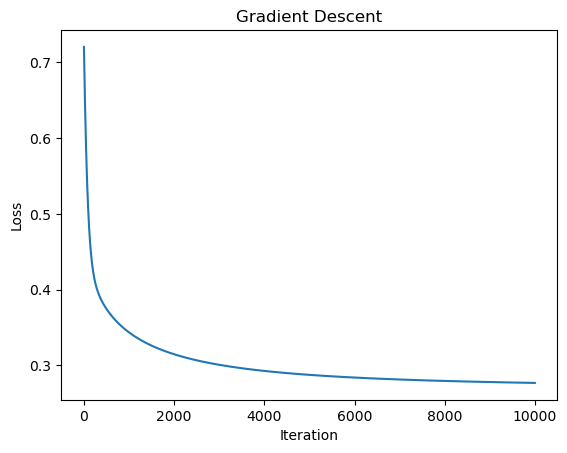

Iteration 0: Loss = 0.7927360086502718
Iteration 1000: Loss = 0.3649337407073584
Iteration 2000: Loss = 0.321840489972815
Iteration 3000: Loss = 0.30380247993826875
Iteration 4000: Loss = 0.2941682715048089
Iteration 5000: Loss = 0.2883186395436454
Iteration 6000: Loss = 0.284463994855538
Iteration 7000: Loss = 0.28177281448858316
Iteration 8000: Loss = 0.2798104009452306
Iteration 9000: Loss = 0.27832968439443073


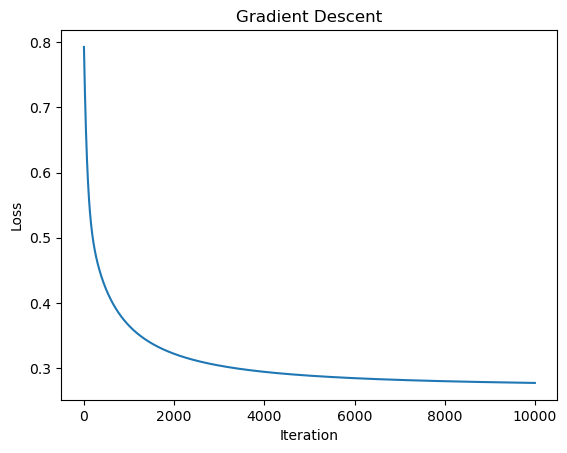



Learning Rate: 0.01, Iterations: 10000, Accuracy: 88.41%


Iteration 0: Loss = 0.5529217340618385
Iteration 1000: Loss = 0.48579496769803354
Iteration 2000: Loss = 0.45459526383672044
Iteration 3000: Loss = 0.4331788180903308
Iteration 4000: Loss = 0.41645039308545395


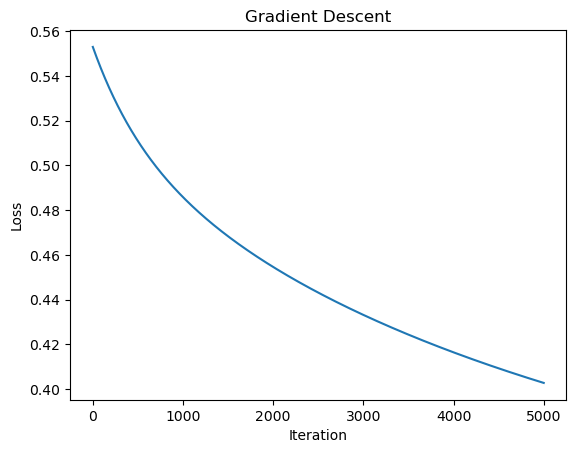

Iteration 0: Loss = 0.5519378435383749
Iteration 1000: Loss = 0.5084045574415829
Iteration 2000: Loss = 0.4755629152892614
Iteration 3000: Loss = 0.4500897410828702
Iteration 4000: Loss = 0.4298587524797614


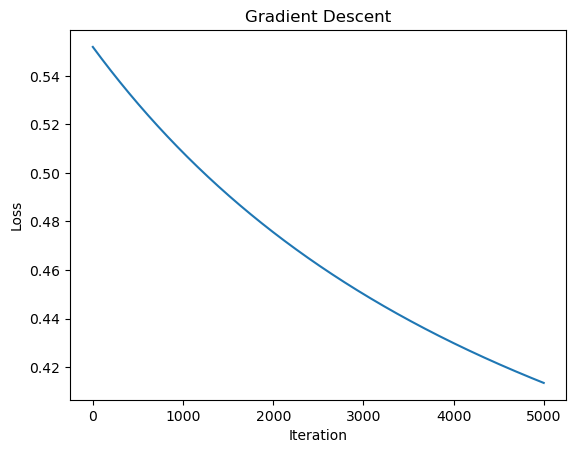



Learning Rate: 0.001, Iterations: 5000, Accuracy: 85.51%


Iteration 0: Loss = 0.5700286408082963
Iteration 1000: Loss = 0.5105328295461208
Iteration 2000: Loss = 0.4748651427125063
Iteration 3000: Loss = 0.44892819527246486
Iteration 4000: Loss = 0.42853146230043565
Iteration 5000: Loss = 0.41195709373511
Iteration 6000: Loss = 0.39822691479745803
Iteration 7000: Loss = 0.3866833946324654
Iteration 8000: Loss = 0.3768553153246692
Iteration 9000: Loss = 0.3683950101283322


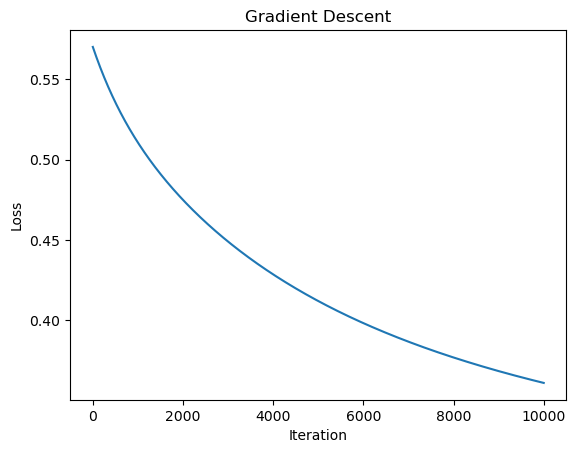

Iteration 0: Loss = 0.5338049246554037
Iteration 1000: Loss = 0.4864478103435129
Iteration 2000: Loss = 0.4564964761811352
Iteration 3000: Loss = 0.4340947323007118
Iteration 4000: Loss = 0.41638540965121773
Iteration 5000: Loss = 0.40198403085143725
Iteration 6000: Loss = 0.39003080585854644
Iteration 7000: Loss = 0.3799427980678242
Iteration 8000: Loss = 0.3713088565962995
Iteration 9000: Loss = 0.3638310688360616


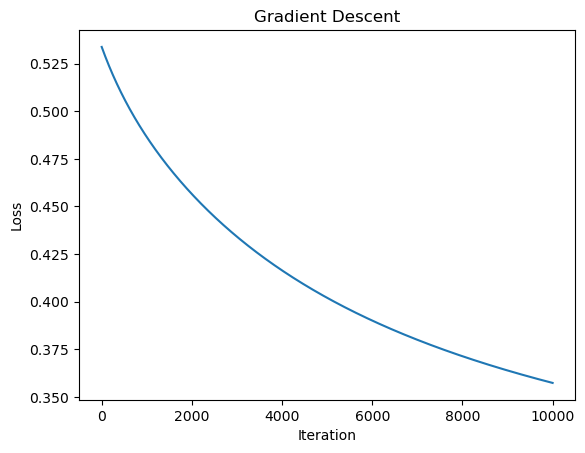



Learning Rate: 0.001, Iterations: 10000, Accuracy: 88.41%


Iteration 0: Loss = 0.6430710765622634
Iteration 1000: Loss = 0.6428270444098663
Iteration 2000: Loss = 0.6425832702346616
Iteration 3000: Loss = 0.6423397538348877
Iteration 4000: Loss = 0.6420964950087322


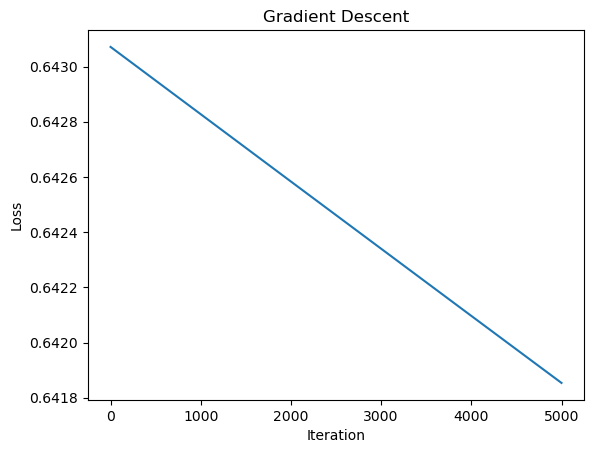

Iteration 0: Loss = 0.613995282742649
Iteration 1000: Loss = 0.6139260535339681
Iteration 2000: Loss = 0.6138568530409942
Iteration 3000: Loss = 0.6137876812399942
Iteration 4000: Loss = 0.613718538107263


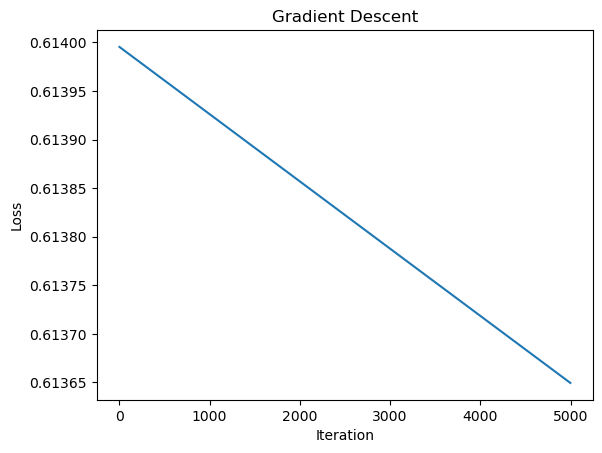



Learning Rate: 1e-06, Iterations: 5000, Accuracy: 85.51%


Iteration 0: Loss = 0.5587866750608745
Iteration 1000: Loss = 0.5586649721266411
Iteration 2000: Loss = 0.5585433986762712
Iteration 3000: Loss = 0.5584219545614356
Iteration 4000: Loss = 0.5583006396339252
Iteration 5000: Loss = 0.5581794537456534
Iteration 6000: Loss = 0.5580583967486555
Iteration 7000: Loss = 0.5579374684950886
Iteration 8000: Loss = 0.5578166688372306
Iteration 9000: Loss = 0.5576959976274828


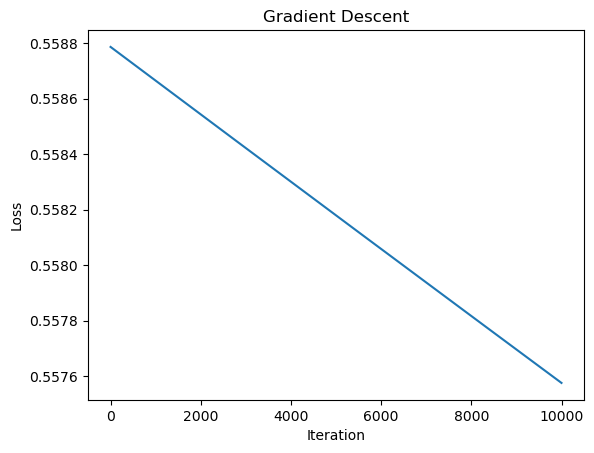

Iteration 0: Loss = 0.605223351484911
Iteration 1000: Loss = 0.60498715991699
Iteration 2000: Loss = 0.604751222096213
Iteration 3000: Loss = 0.6045155378234484
Iteration 4000: Loss = 0.6042801068995066
Iteration 5000: Loss = 0.604044929125146
Iteration 6000: Loss = 0.6038100043010677
Iteration 7000: Loss = 0.6035753322279238
Iteration 8000: Loss = 0.6033409127063096
Iteration 9000: Loss = 0.60310674553677


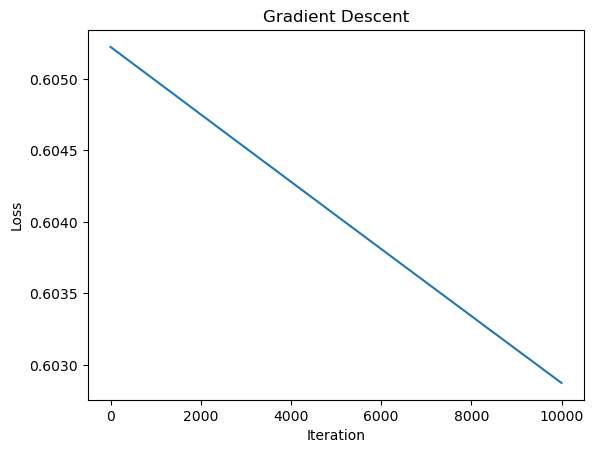



Learning Rate: 1e-06, Iterations: 10000, Accuracy: 88.41%




Best Hyperparameters: Learning Rate: 0.1, Iterations: 5000, Best Accuracy: 88.41%




In [43]:
class LogitRegression():

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, feature):
        return 1 / (1 + np.exp(-feature))

    def cost(self, y_train, x_train):
        z = np.dot(x_train, self.weights.T) + self.bias
        h = self.sigmoid(z)

        parameter1 = -(y_train) * np.log(h)
        parameter2 = (1 - y_train) * np.log(1 - h)

        j = (1 / len(y_train)) * np.sum(parameter1 - parameter2)

        return j

    def gradient_descent(self, y_train, x_train):
        z = np.dot(x_train, self.weights.T) + self.bias
        pred = self.sigmoid(z)

        difference_y = pred - y_train

        update_weight = np.dot(x_train.T, difference_y) / len(y_train)
        update_bias = np.sum(difference_y) / len(y_train)

        return update_weight, update_bias

    def scaling(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_scaled = (X - mean) / std
        return X_scaled

    def fit(self, x_train, y_train):
        X_scaled = self.scaling(x_train)
        rows, features = X_scaled.shape
        self.weights = np.random.uniform(0, 1, features)
        self.bias = 0.5
        loss = []

        for i in range(self.iterations):
            updated_weights, updated_bias = self.gradient_descent(y_train, X_scaled)
            loss.append(self.cost(y_train, X_scaled))

            self.weights = self.weights - (self.learning_rate * updated_weights)
            self.bias = self.bias - (self.learning_rate * updated_bias)

            if i % 1000 == 0:
                print(f"Iteration {i}: Loss = {loss[-1]}")

            # Implement early stopping based on the loss curve
            if i > 0 and loss[i] > loss[i - 1]:
                break
        plt.plot(range(len(loss)), loss)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Gradient Descent')
        plt.show()
        return loss

    def predict(self, x_test):
        X_scaled = self.scaling(x_test)

        z = np.dot(X_scaled, self.weights.T) + self.bias
        y_hat = self.sigmoid(z)

        y_pred = []

        for y_value in y_hat:
            if y_value >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)

        return y_pred

def accuracy(y_test, y_pred):
    matched_values = np.sum(y_test == y_pred)
    return matched_values / len(y_test)

# Define a list of learning rates and iterations to try
learning_rates = [0.1,0.01,0.001,0.000001]
iterations_list = [5000,10000]

best_accuracy = 0.0
best_hyperparameters = None

for learning_rate in learning_rates:
    for iterations in iterations_list:
        logistic_model = LogitRegression(learning_rate, iterations)
        loss_values = logistic_model.fit(X_train, Y_train)

        # Implement early stopping based on the loss curve
        best_iteration = np.argmin(loss_values)

        logistic_model = LogitRegression(learning_rate, best_iteration)
        logistic_model.fit(X_train, Y_train)

        predict = logistic_model.predict(X_test)

        accu = accuracy(Y_test, predict)
        print("\n\nLearning Rate: {}, Iterations: {}, Accuracy: {:.2f}%\n\n".format(learning_rate, iterations, accu * 100))

        if accu > best_accuracy:
            best_accuracy = accu
            best_hyperparameters = (learning_rate, iterations)

print("\n\nBest Hyperparameters: Learning Rate: {}, Iterations: {}, Best Accuracy: {:.2f}%\n\n".format(
    best_hyperparameters[0], best_hyperparameters[1], best_accuracy * 100))


Iteration 0: Loss = 0.5330280697187031
Iteration 1000: Loss = 0.27683578159600103
Iteration 2000: Loss = 0.2723697939647208
Iteration 3000: Loss = 0.27131658055385716
Iteration 4000: Loss = 0.2709431006412252


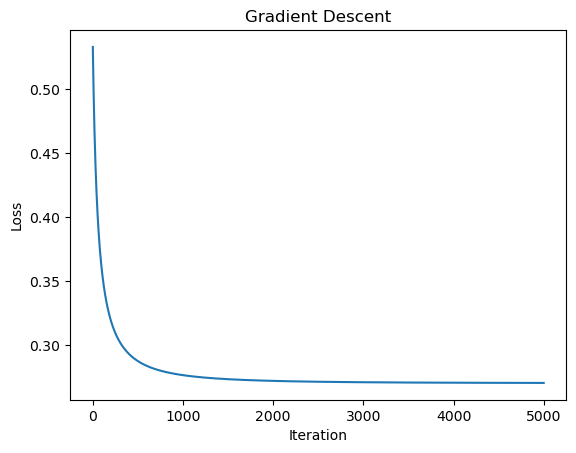

Weight Vector (Coefficients):
[-1.61658411  0.15268963  1.97016979  2.72953025 -0.22075865  3.29792671]


In [44]:
best_model = LogitRegression(best_hyperparameters[0], best_hyperparameters[1])
best_model.fit(X_train, Y_train)
weight_vector = best_model.weights

# Print the weight vector
print("Weight Vector (Coefficients):")
print(weight_vector)

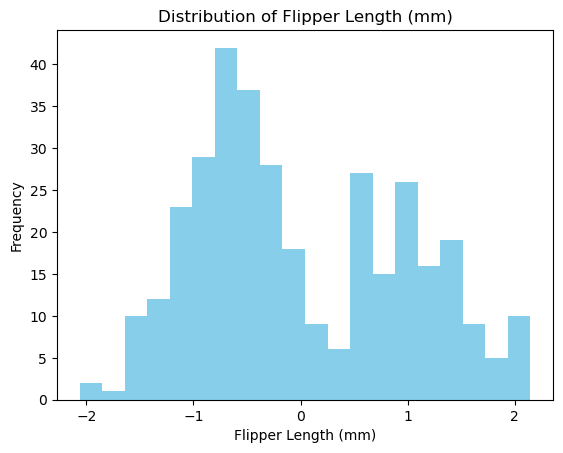

In [45]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(penguins['flipper_length_mm'], bins=20, color='skyblue')
plt.title('Distribution of Flipper Length (mm)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()


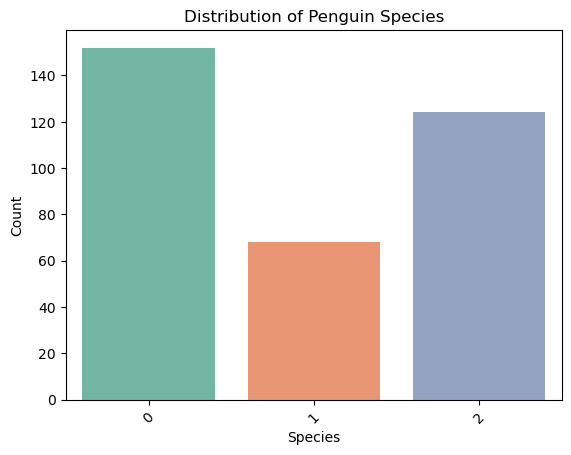

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
sns.countplot(data=penguins, x='species', palette='Set2')
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


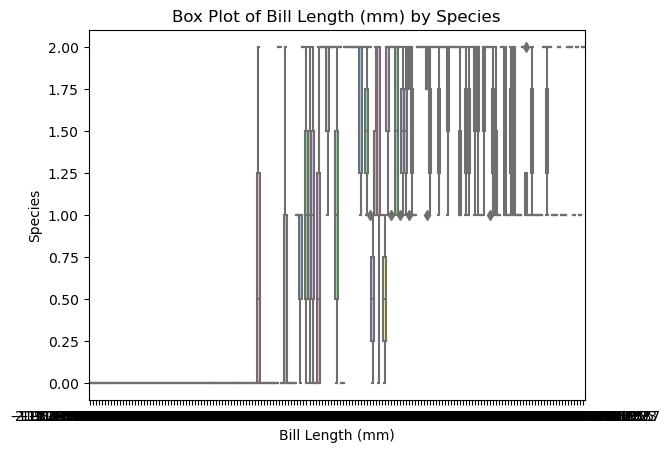

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(data=penguins, x='bill_length_mm', y='species', palette='pastel')
plt.title('Box Plot of Bill Length (mm) by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Species')
plt.show()


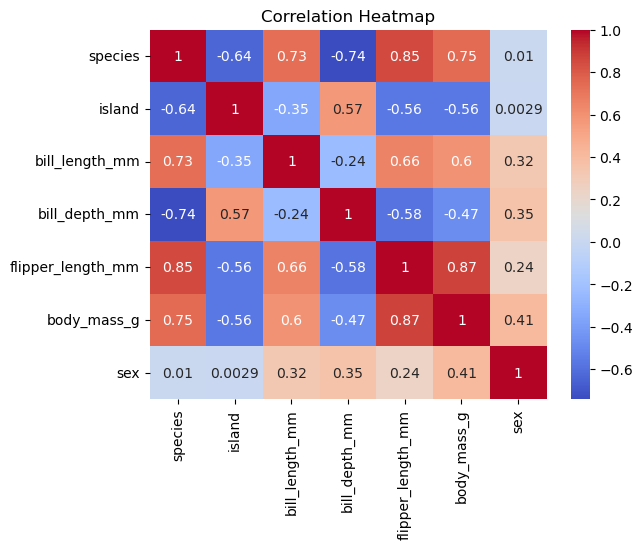

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = penguins.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


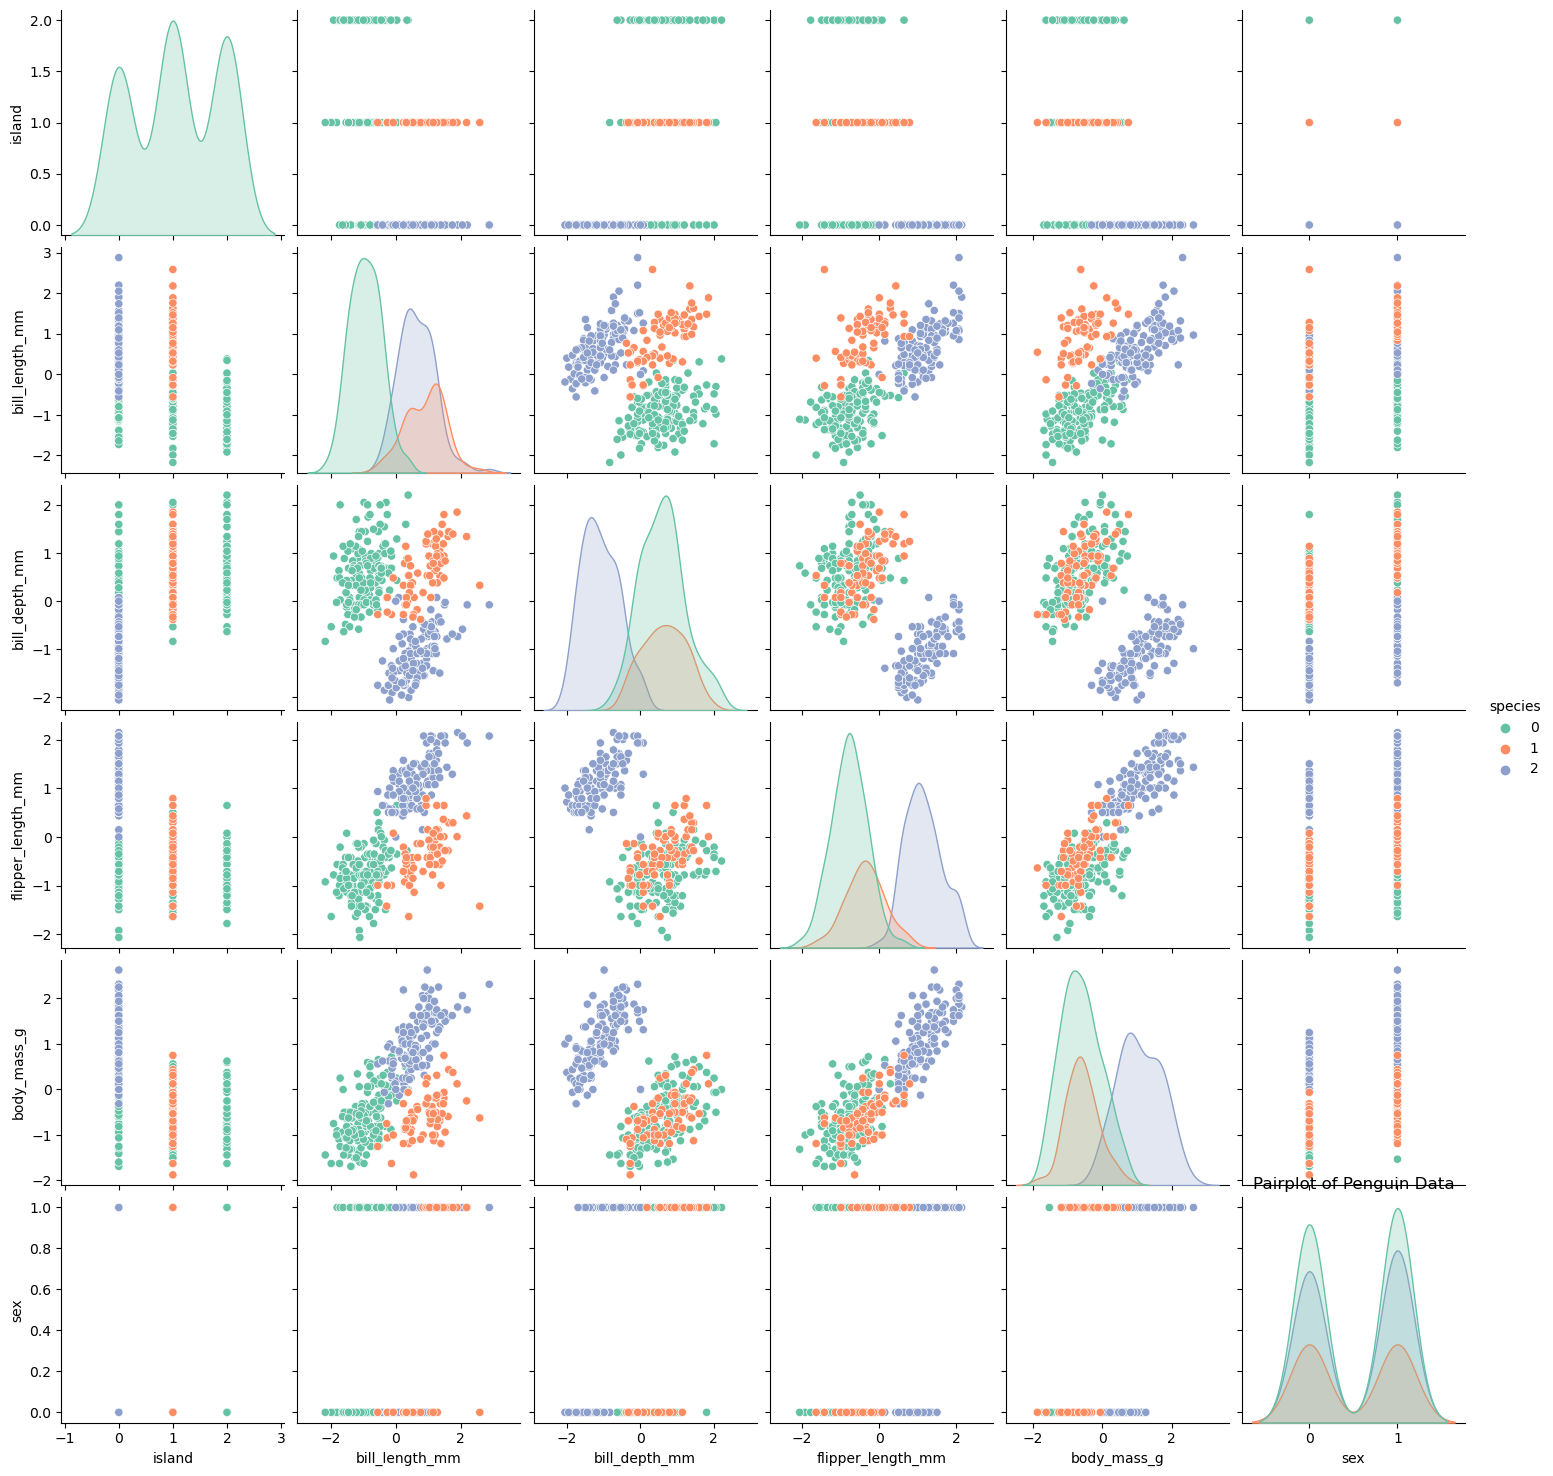

In [49]:
import seaborn as sns

# Create a pairplot
sns.pairplot(penguins, hue='species', palette='Set2')
plt.title('Pairplot of Penguin Data')
plt.show()
